# Airline Passenger Satisfaction - Preprocessing

In [189]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [190]:
# loading data
train = pd.read_csv('finalDataset2/train.csv')
# df_train['type']="train"
test = pd.read_csv('finalDataset2/test.csv')
# df_test['type']="test"

In [191]:
# combining train and test data
data = pd.concat([test.assign(ind="test"), train.assign(ind="train")])

In [192]:
# presenting data
data

id  Customer Type   Age  Type of Travel  Class  Flight Distance  \
0       19556.0            1.0  52.0             1.0    0.0            160.0   
1       90035.0            1.0  36.0             1.0    2.0           2863.0   
2       12360.0            0.0  20.0             1.0    0.0            192.0   
3       77959.0            1.0  44.0             1.0    2.0           3377.0   
4       36875.0            1.0  49.0             1.0    0.0           1182.0   
...         ...            ...   ...             ...    ...              ...   
103899  94171.0            0.0  23.0             1.0    0.0            192.0   
103900  73097.0            1.0  49.0             1.0    2.0           2347.0   
103901  68825.0            0.0  30.0             1.0    2.0           1995.0   
103902  54173.0            0.0  22.0             1.0    0.0           1000.0   
103903  62567.0            1.0  27.0             1.0    2.0           1723.0   

        Inflight wifi service  Departure/Arrival time convenient  \
0                         5.0                                4.0   
1                         1.0                                1.0   
2                         2.0                                0.0   
3                         0.0                                0.0   
4                         2.0                                3.0   
...                       ...                                ...   
103899                    2.0                                1.0   
103900                    4.0                                4.0   
103901                    1.0                                1.0   
103902                    1.0                                1.0   
103903                    1.0                                3.0   

        Ease of Online booking  Gate location  ...  Baggage handling  \
0                          3.0            4.0  ...               5.0   
1                          3.0            1.0  ...               4.0   
2                          2.0            4.0  ...               3.0   
3                          0.0            2.0  ...               1.0   
4                          4.0            3.0  ...               2.0   
...                        ...            ...  ...               ...   
103899                     2.0            3.0  ...               4.0   
103900                     4.0            4.0  ...               5.0   
103901                     1.0            3.0  ...               4.0   
103902                     1.0            5.0  ...               1.0   
103903                     3.0            3.0  ...               4.0   

        Checkin service  Inflight service  Cleanliness  \
0                   2.0               5.0          5.0   
1                   3.0               4.0          5.0   
2                   2.0               2.0          2.0   
3                   3.0               1.0          4.0   
4                   4.0               2.0          4.0   
...                 ...               ...          ...   
103899              2.0               3.0          2.0   
103900              5.0               5.0          4.0   
103901              5.0               5.0          4.0   
103902              5.0               4.0          1.0   
103903              4.0               3.0          1.0   

        Departure Delay in Minutes  Arrival Delay in Minutes  satisfaction  \
0                             50.0                      44.0           1.0   
1                              0.0                       0.0           1.0   
2                              0.0                       0.0           0.0   
3                              0.0                       6.0           1.0   
4                              0.0                      20.0           1.0   
...                            ...                       ...           ...   
103899                         3.0                       0.0           0.0   
103900                         0.0               

## Filling missing data

In [193]:
# data staticstics
data.describe()

id  Customer Type            Age  Type of Travel  \
count  129360.000000  129360.000000  129360.000000   129360.000000   
mean    64936.445501       0.816860      39.430728        0.690716   
std     37492.945434       0.386783      15.122226        0.462200   
min         1.000000       0.000000       7.000000        0.000000   
25%     32461.750000       1.000000      27.000000        0.000000   
50%     64936.500000       1.000000      40.000000        1.000000   
75%     97411.250000       1.000000      51.000000        1.000000   
max    129880.000000       1.000000      85.000000        1.000000   

               Class  Flight Distance  Inflight wifi service  \
count  129360.000000     129360.00000          129360.000000   
mean        1.029692       1190.33464               2.729004   
std         0.962636        997.31967               1.329456   
min         0.000000         31.00000               0.000000   
25%         0.000000        414.00000               2.000000   
50%         1.000000        844.00000               3.000000   
75%         2.000000       1744.00000               4.000000   
max         2.000000       4983.00000               5.000000   

       Departure/Arrival time convenient  Ease of Online booking  \
count                      129360.000000           129360.000000   
mean                            3.057638                2.756865   
std                             1.526884                1.401847   
min                             0.000000                0.000000   
25%                             2.000000                2.000000   
50%                             3.000000                3.000000   
75%                             4.000000                4.000000   
max                             5.000000                5.000000   

       Gate location  ...  Leg room service  Baggage handling  \
count  129360.000000  ...     129360.000000     129360.000000   
mean        2.976685  ...          3.350974          3.631903   
std         1.278507  ...          1.316270          1.180072   
min         0.000000  ...          0.000000          1.000000   
25%         2.000000  ...          2.000000          3.000000   
50%         3.000000  ...          4.000000          4.000000   
75%         4.000000  ...          4.000000          5.000000   
max         5.000000  ...          5.000000          5.000000   

       Checkin service  Inflight service    Cleanliness  \
count    129360.000000     129360.000000  129360.000000   
mean          3.306416          3.642084       3.286534   
std           1.266022          1.176618       1.313549   
min           0.000000          0.000000       0.000000   
25%           3.000000          3.000000       2.000000   
50%           3.000000          4.000000       3.000000   
75%           4.000000          5.000000       4.000000   
max           5.000000          5.000000       5.000000   

       Departure Delay in Minutes  Arrival Delay in Minutes   satisfaction  \
count               129360.000000             128970.000000  129360.000000   
mean                    14.715353                 15.090083       0.434392   
std                     38.101303                 38.471614       0.495679   
min                      0.000000                  0.000000       0.000000   
25%                      0.000000                  0.000000       0.000000   
50%                      0.000000                  0.000000       0.000000   
75%                     12.000000                 13.000000       1.000000   
max                   1592.000000               1584.000000       1.000000   

                Male         Female  
count  129360.000000  129360.000000  
mean        0.492525       0.507452  
std         0.499946       0.499946  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       1.000000  
75%         1.000000       1.000000  
max         1.000000       1.000000  

[8 rows x 25 columns]

In [194]:
# train dataset number of missing data
data.isna().sum().head()

id                520
Customer Type     520
Age               520
Type of Travel    520
Class             520
dtype: int64

### Mean completion

In [195]:
# filling missing data with mean
data_mean = data.fillna(data.mean())
data_mean.isna().sum().head()

id                0
Customer Type     0
Age               0
Type of Travel    0
Class             0
dtype: int64

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'Customer Type'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Type of Travel'}>,
        <AxesSubplot:title={'center':'Class'}>],
       [<AxesSubplot:title={'center':'Flight Distance'}>,
        <AxesSubplot:title={'center':'Inflight wifi service'}>,
        <AxesSubplot:title={'center':'Departure/Arrival time convenient'}>,
        <AxesSubplot:title={'center':'Ease of Online booking'}>,
        <AxesSubplot:title={'center':'Gate location'}>],
       [<AxesSubplot:title={'center':'Food and drink'}>,
        <AxesSubplot:title={'center':'Online boarding'}>,
        <AxesSubplot:title={'center':'Seat comfort'}>,
        <AxesSubplot:title={'center':'Inflight entertainment'}>,
        <AxesSubplot:title={'center':'On-board service'}>],
       [<AxesSubplot:title={'center':'Leg room service'}>,
        <AxesSubplot:title={'center':'Baggage handling'}>,
        <AxesS

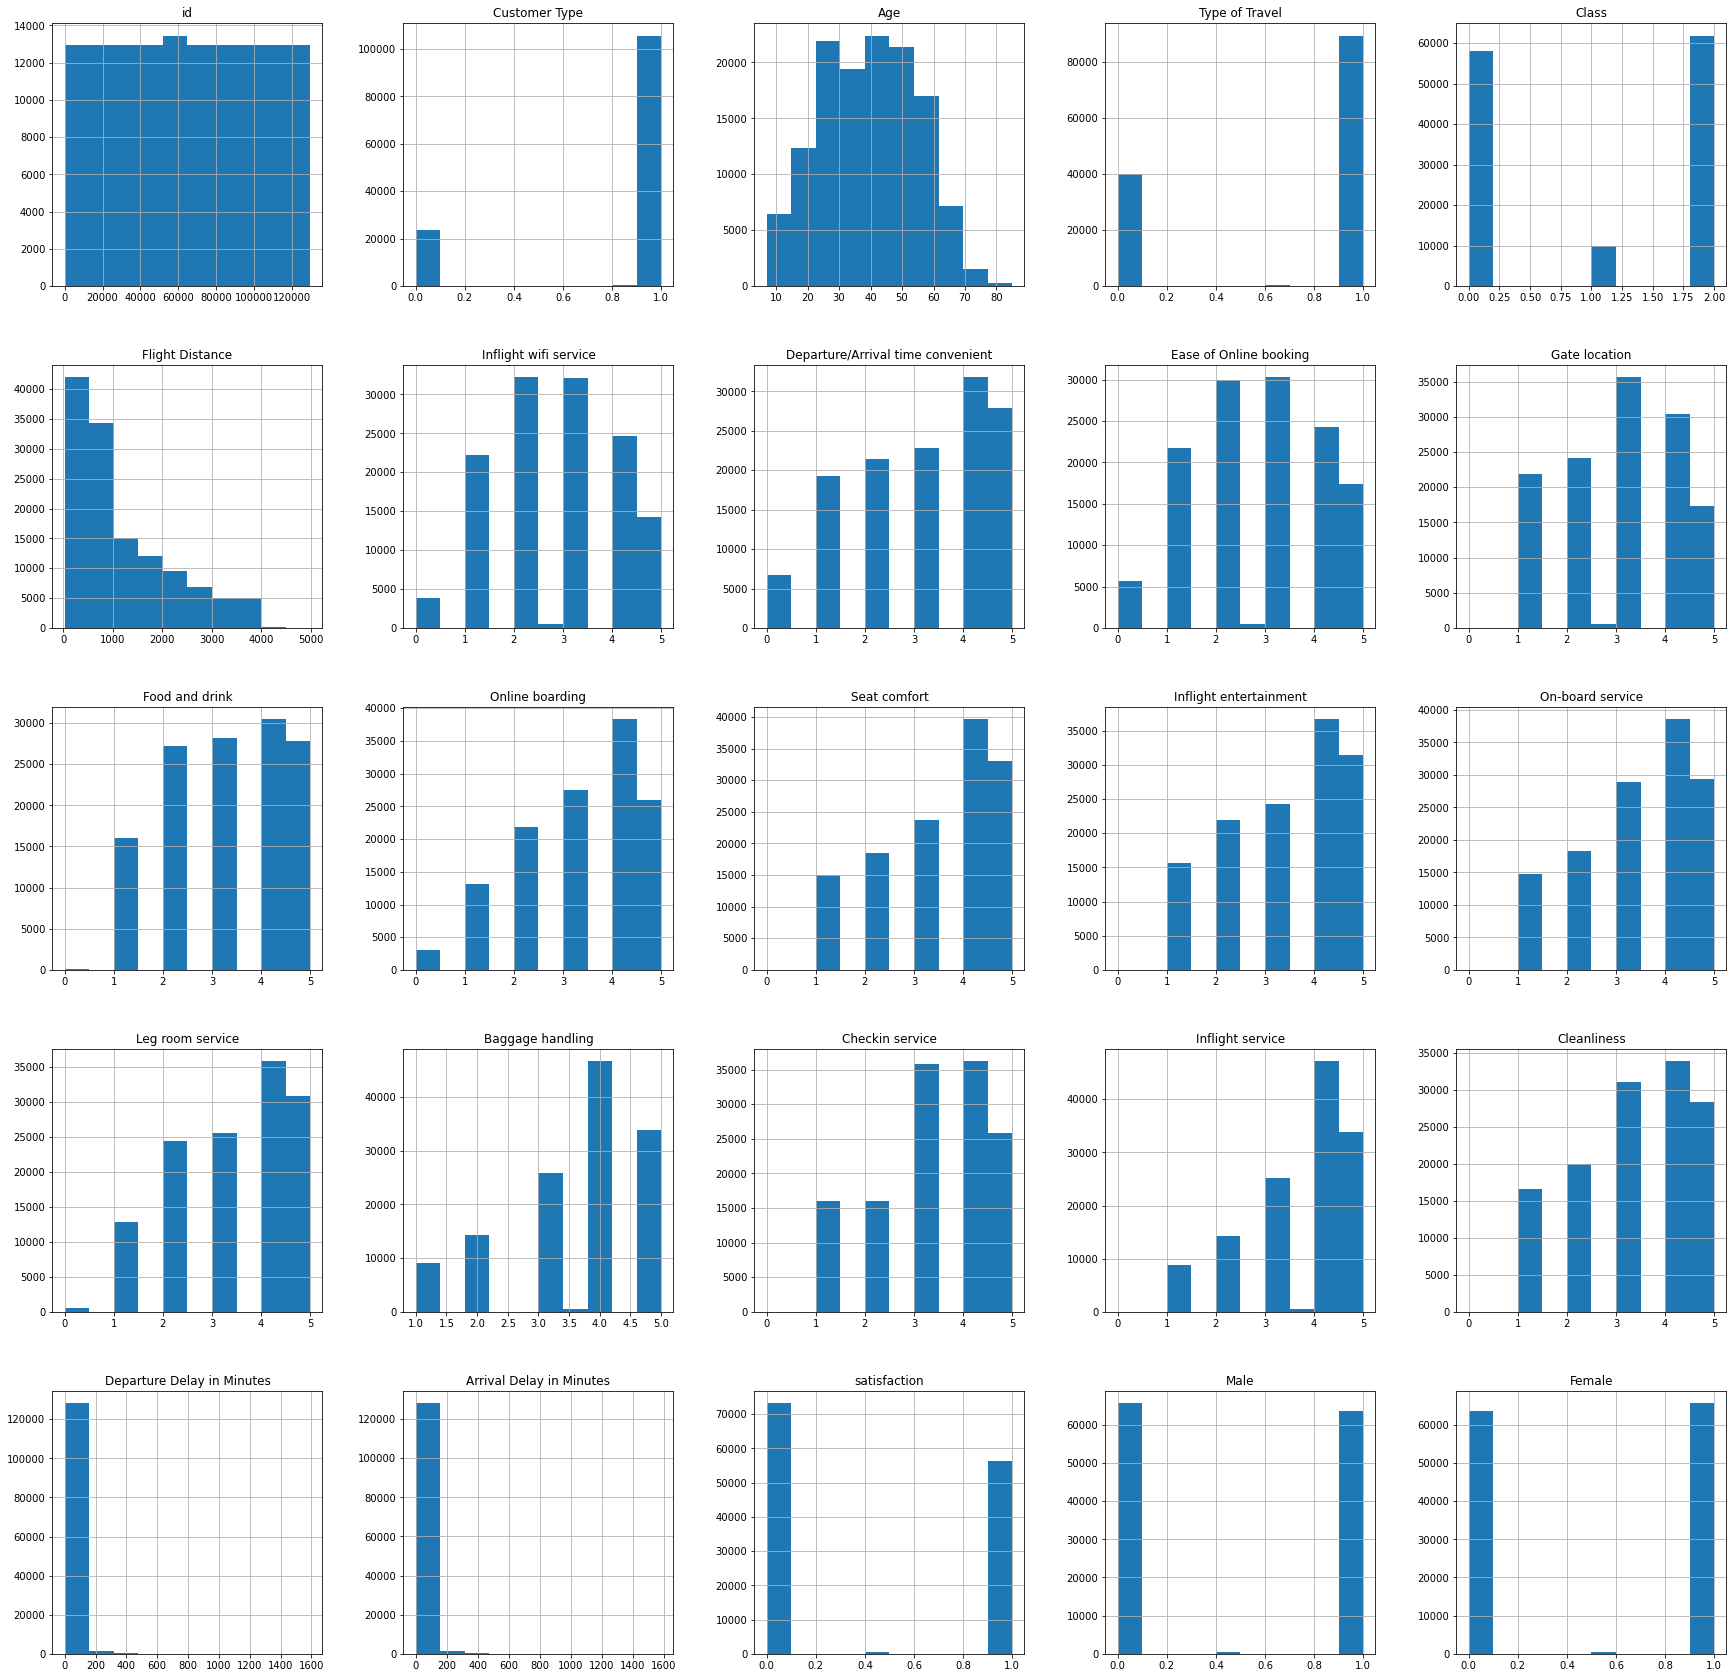

In [196]:
data_mean.hist(figsize=(30, 30))

### Mediane completion

In [197]:
# filling missing data with median
data_median = data.fillna(data.median())
data_median.isna().sum().head()

id                0
Customer Type     0
Age               0
Type of Travel    0
Class             0
dtype: int64

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'Customer Type'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Type of Travel'}>,
        <AxesSubplot:title={'center':'Class'}>],
       [<AxesSubplot:title={'center':'Flight Distance'}>,
        <AxesSubplot:title={'center':'Inflight wifi service'}>,
        <AxesSubplot:title={'center':'Departure/Arrival time convenient'}>,
        <AxesSubplot:title={'center':'Ease of Online booking'}>,
        <AxesSubplot:title={'center':'Gate location'}>],
       [<AxesSubplot:title={'center':'Food and drink'}>,
        <AxesSubplot:title={'center':'Online boarding'}>,
        <AxesSubplot:title={'center':'Seat comfort'}>,
        <AxesSubplot:title={'center':'Inflight entertainment'}>,
        <AxesSubplot:title={'center':'On-board service'}>],
       [<AxesSubplot:title={'center':'Leg room service'}>,
        <AxesSubplot:title={'center':'Baggage handling'}>,
        <AxesS

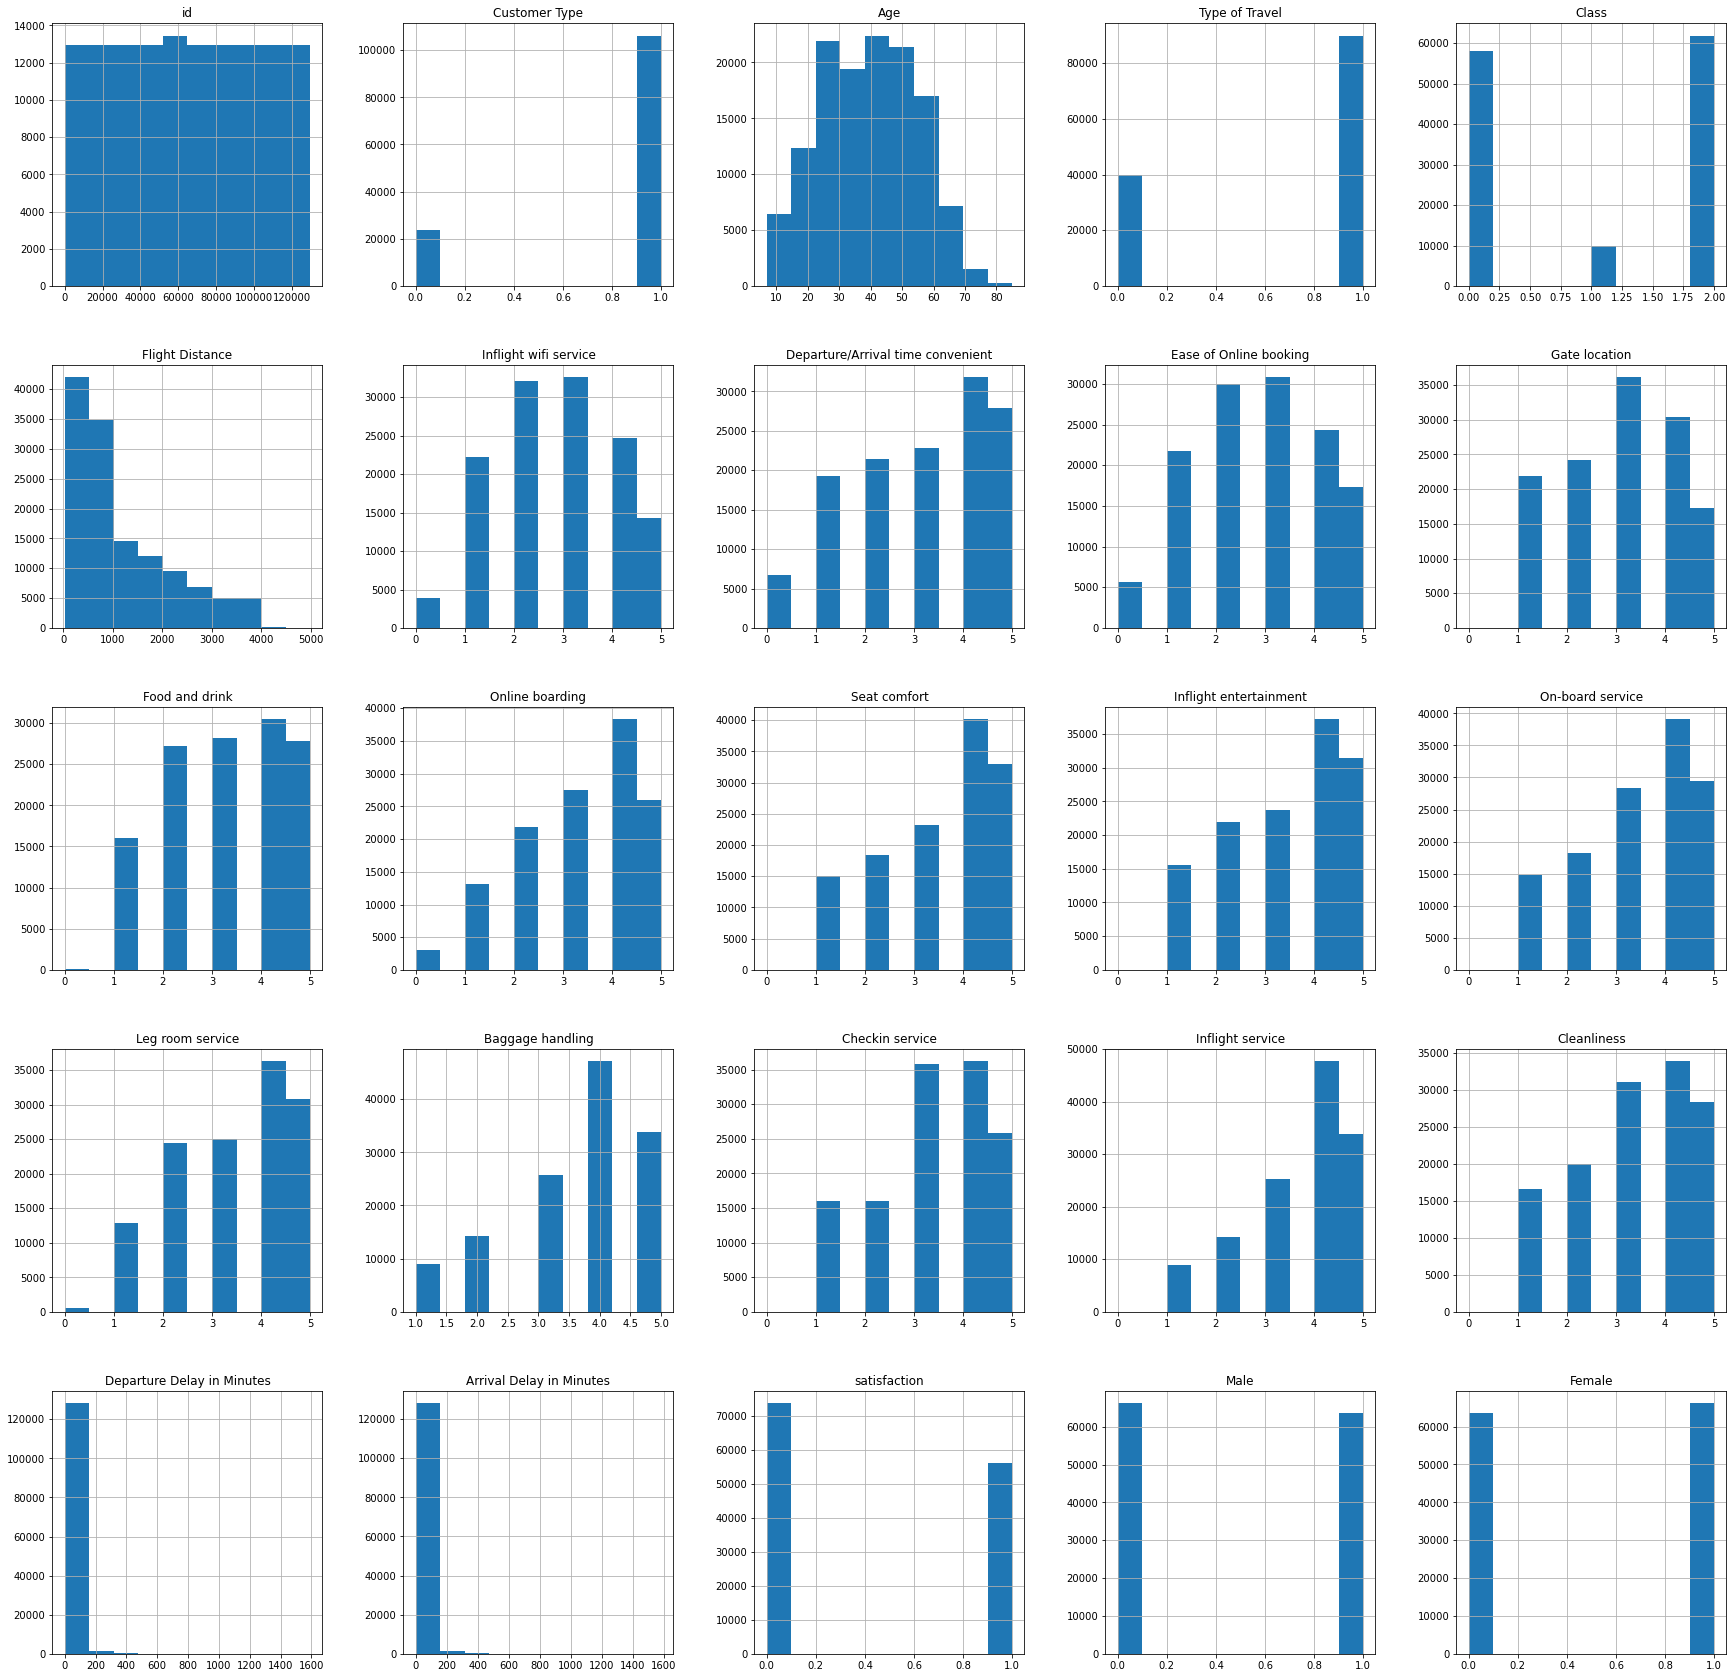

In [198]:
data_median.hist(figsize=(30, 30))

### Interpolation

In [199]:
# filling missing data by interpolation
data_interpolated = data.interpolate()
data_interpolated.isna().sum().head()

id                0
Customer Type     0
Age               0
Type of Travel    0
Class             0
dtype: int64

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'Customer Type'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Type of Travel'}>,
        <AxesSubplot:title={'center':'Class'}>],
       [<AxesSubplot:title={'center':'Flight Distance'}>,
        <AxesSubplot:title={'center':'Inflight wifi service'}>,
        <AxesSubplot:title={'center':'Departure/Arrival time convenient'}>,
        <AxesSubplot:title={'center':'Ease of Online booking'}>,
        <AxesSubplot:title={'center':'Gate location'}>],
       [<AxesSubplot:title={'center':'Food and drink'}>,
        <AxesSubplot:title={'center':'Online boarding'}>,
        <AxesSubplot:title={'center':'Seat comfort'}>,
        <AxesSubplot:title={'center':'Inflight entertainment'}>,
        <AxesSubplot:title={'center':'On-board service'}>],
       [<AxesSubplot:title={'center':'Leg room service'}>,
        <AxesSubplot:title={'center':'Baggage handling'}>,
        <AxesS

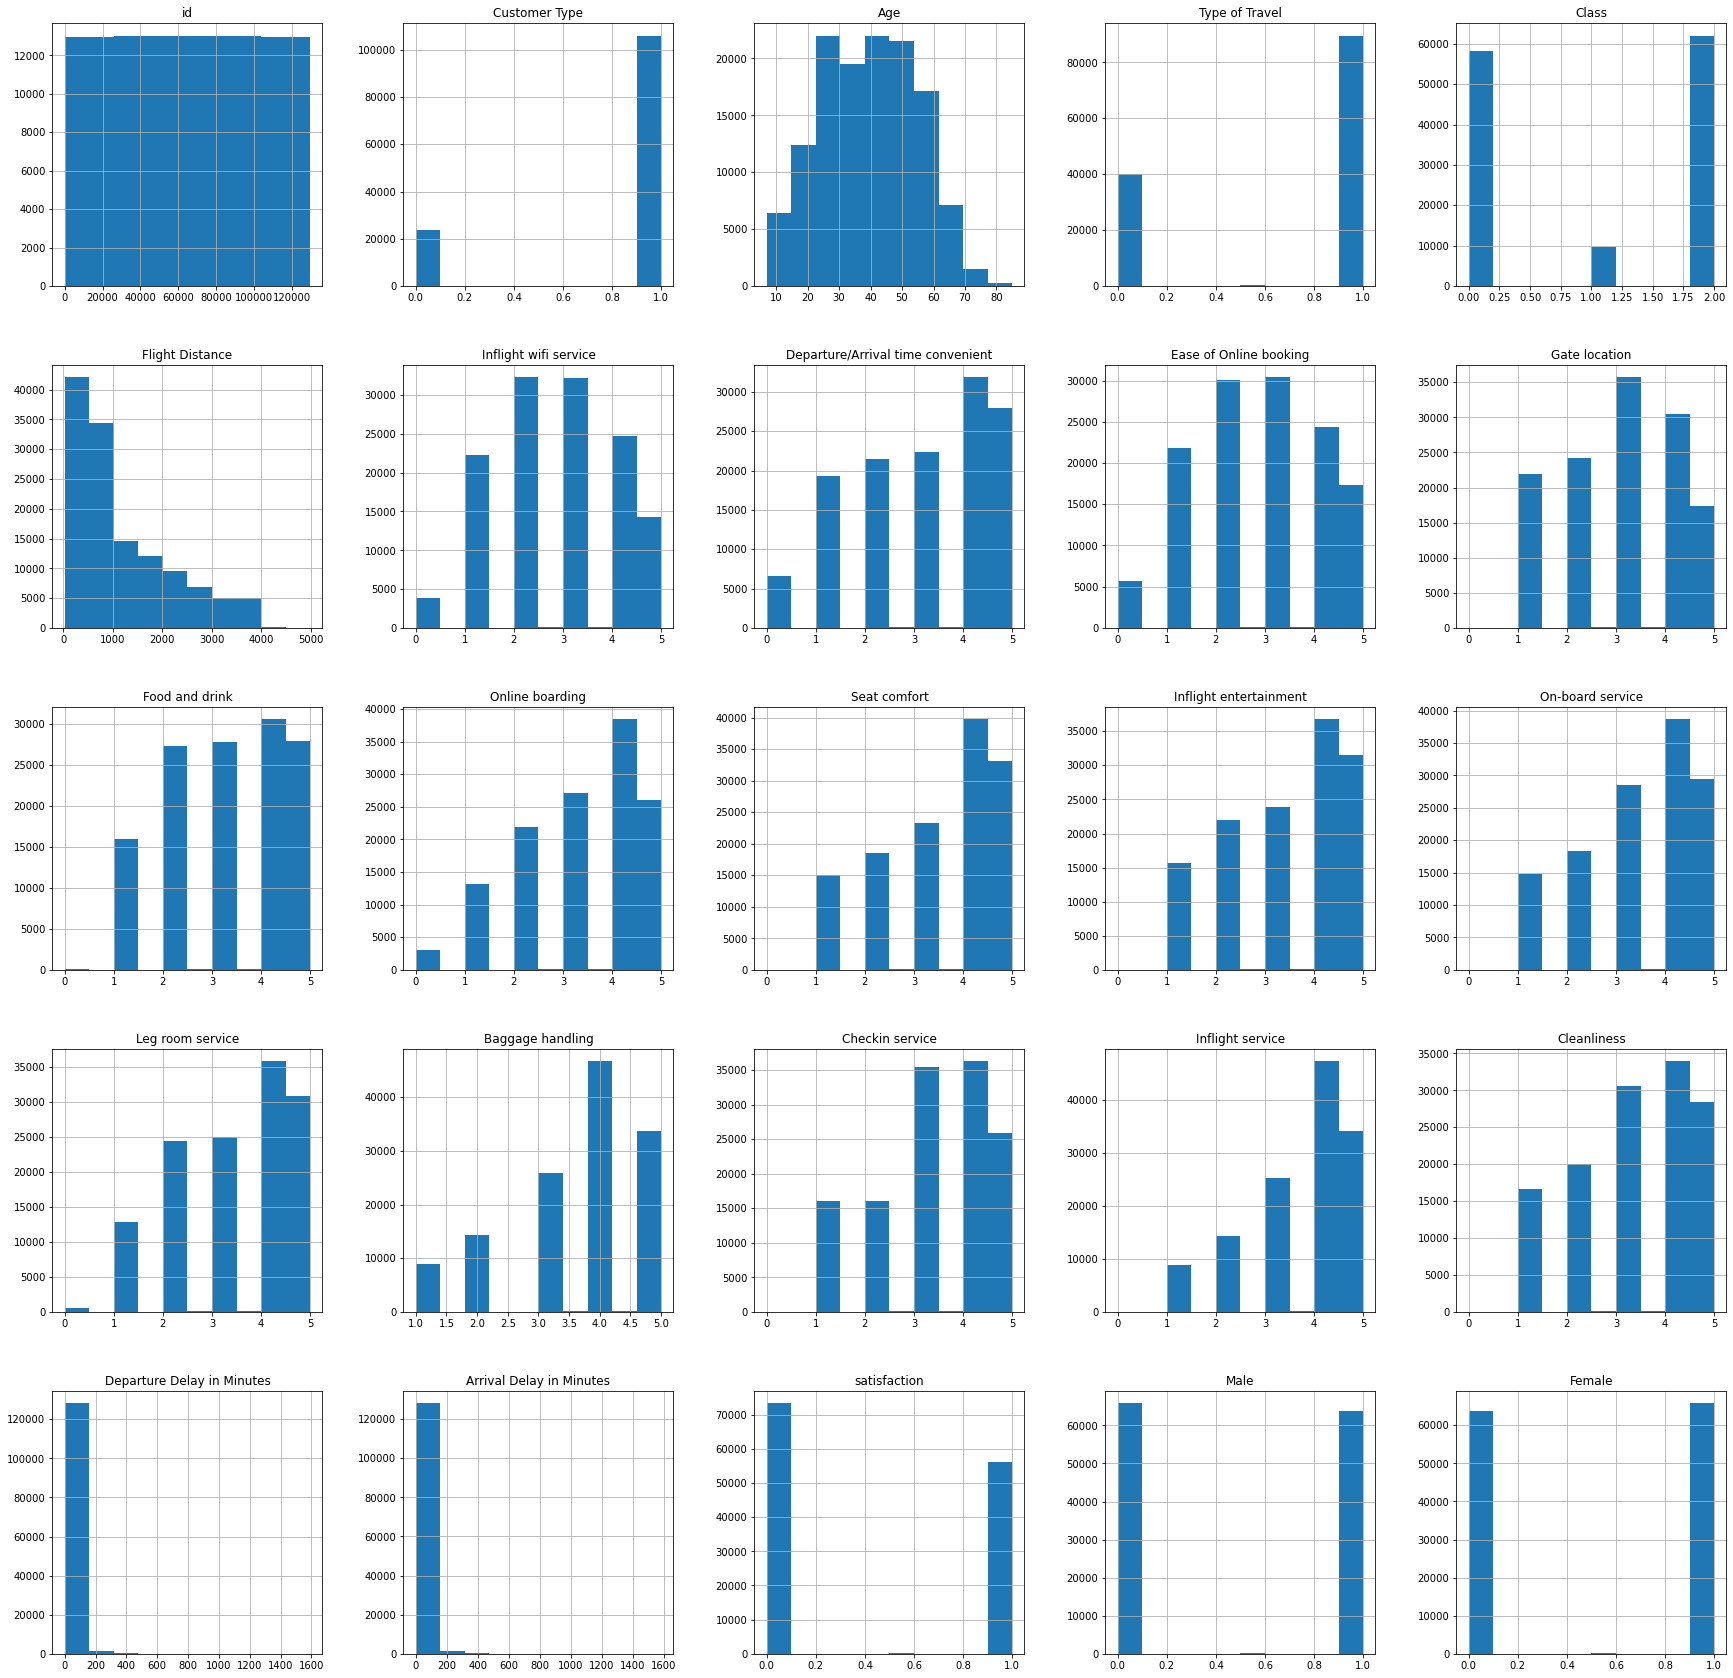

In [200]:
data_interpolated.hist(figsize=(30, 30))

## Data distribution

In [204]:
data = data_interpolated

In [262]:
from matplotlib.pyplot import figure
# age = data['Flight Distance']
# plt.hist(np.log(age))
def plotHist(data, title=''):
    plt.hist(data)
    plt.title(title)
    plt.show()
    plt.close()

('Flight Distance', 1.1077870154663216)


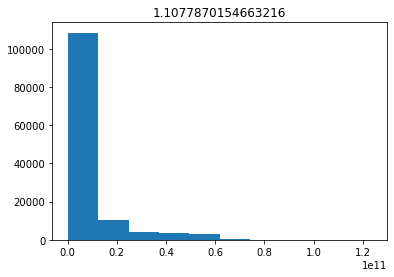

('Departure Delay in Minutes', 6.828459030836458)


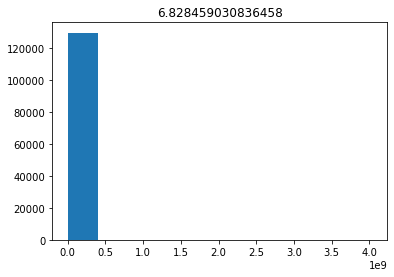

('Arrival Delay in Minutes', 6.683078893326015)


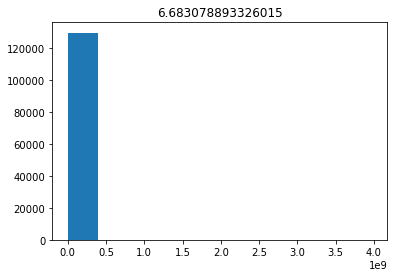

In [276]:
# Histograms of transformed columns with skewed distribution
comlsNotToPlot = ['id', 'Type of Travel', 'satisfaction', 'Male', 'Female', 'Customer Type', 'ind']
df = data.drop(comlsNotToPlot, 1)
for x in zip(df.columns, df.skew(axis=0)):
    if x[1] > 1: # positive/right skewd
        print(x)
        plotHist((data[x[0]]*data[x[0]]*data[x[0]]), x[1])
    elif x[1] < -1: # negative/left skewd
        print(x)
        plotHist(np.log(data[x[0]]), x[1])

In [274]:
from matplotlib.pyplot import figure
# age = data['Flight Distance']
# plt.hist(np.log(age))
def plotBox(data, title=''):
    plt.boxplot(data)
    plt.title(title)
    plt.show()
    plt.close()

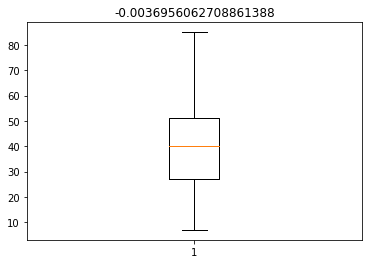

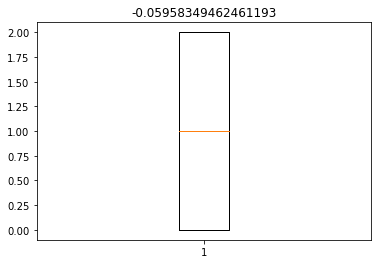

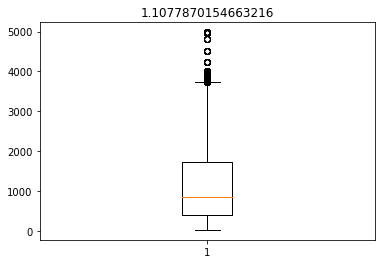

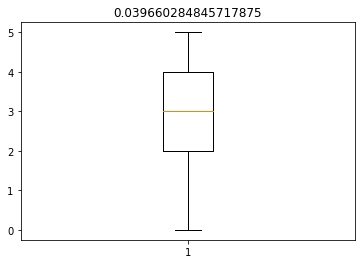

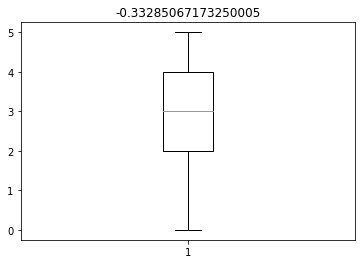

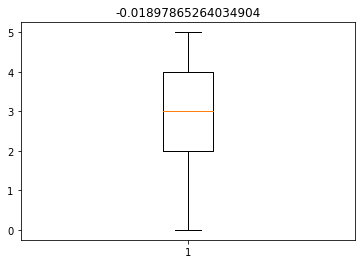

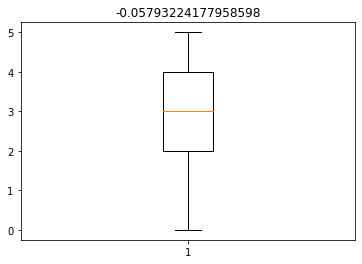

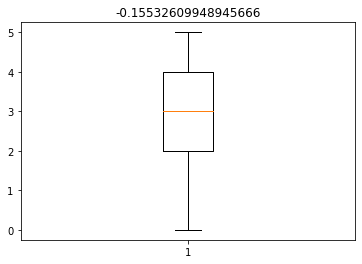

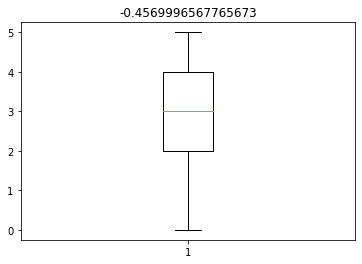

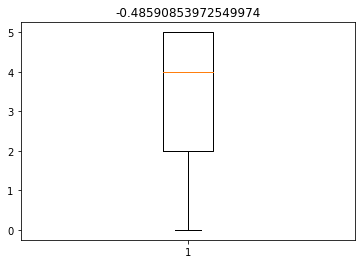

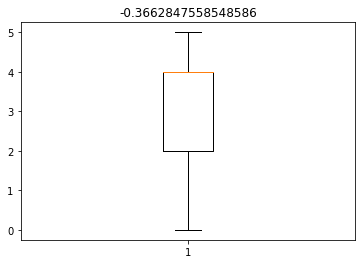

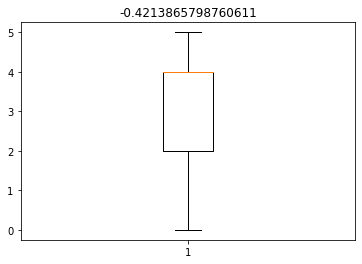

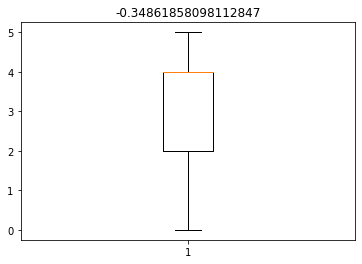

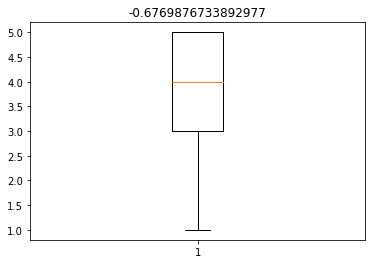

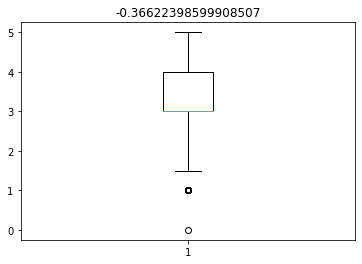

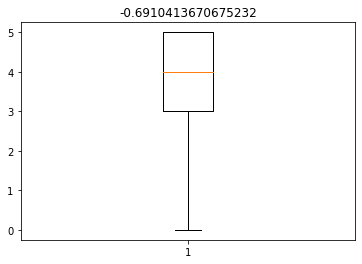

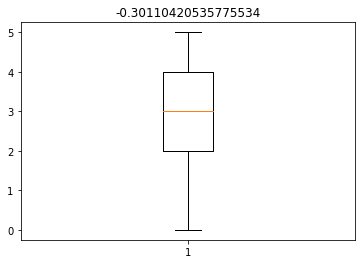

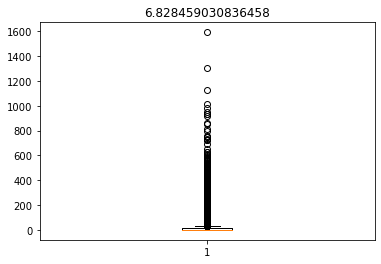

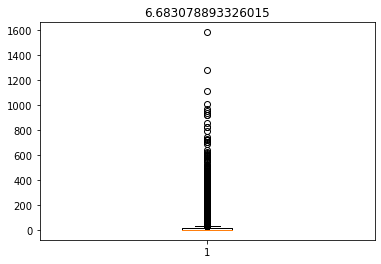

In [280]:
# Boxplots
for x in zip(df.columns, df.skew(axis=0)):
    plotBox((data[x[0]]), x[1])

<AxesSubplot:>

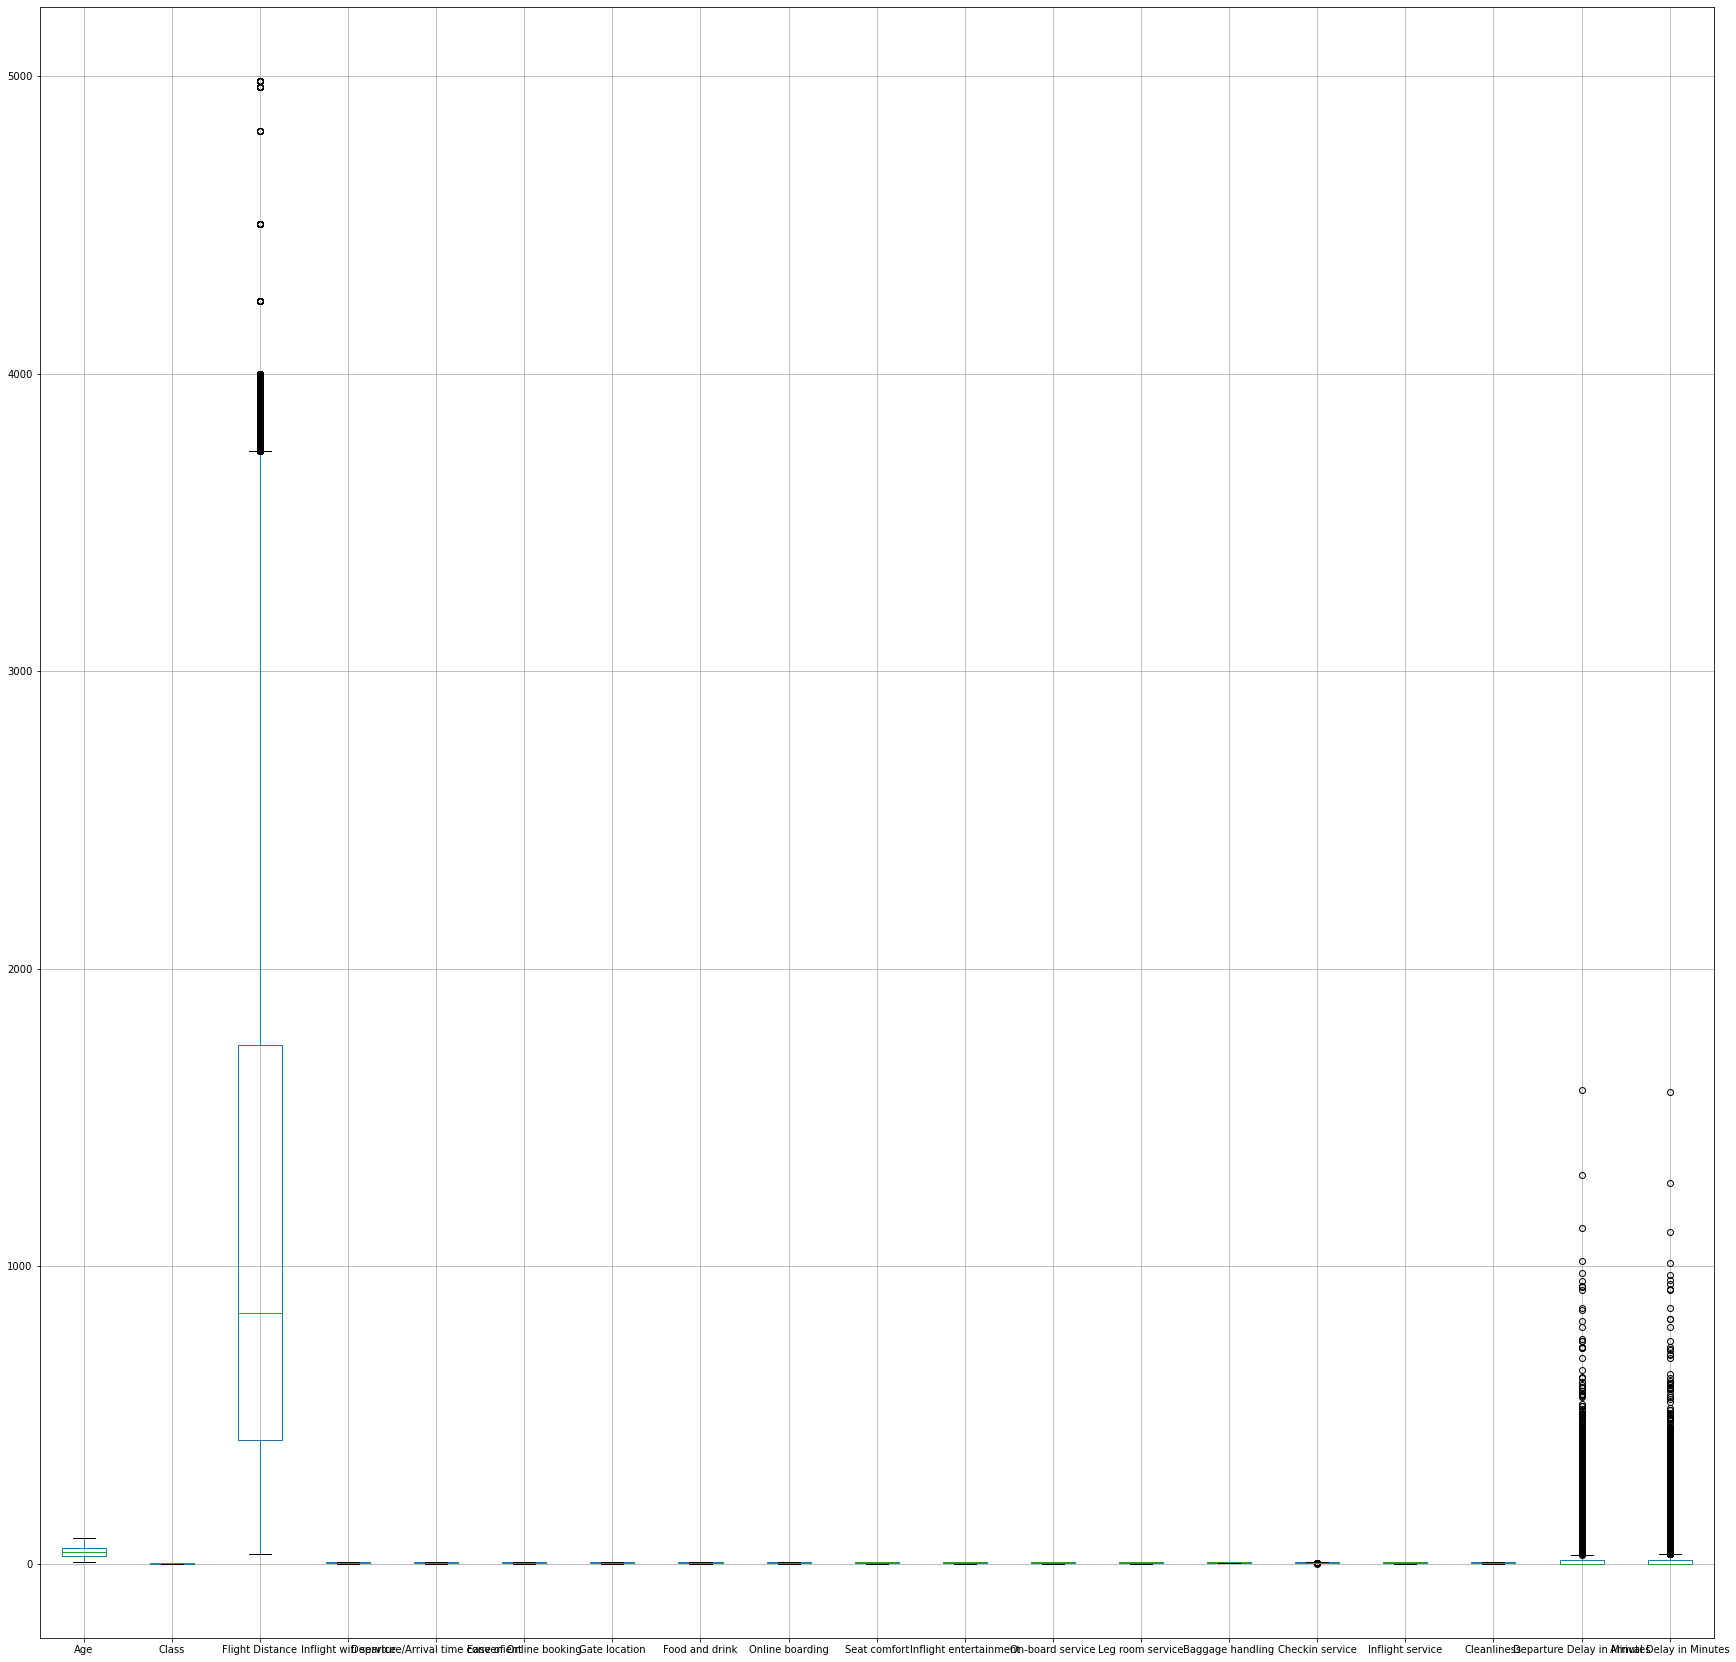

In [279]:
df.boxplot(figsize=(30,30))

### Data Visualization

In [ ]:
def plotScatter(x, y, target, title=''):
    figure(figsize=(10, 10))
    plt.scatter(x, y, title, c = target)

In [ ]:
df = data.drop('id', 1)
for colm in df:
    for colm2 in df:
        if colm != colm2: data.plot.scatter(colm, colm2, data['satisfaction'])

In [ ]:
df = data.drop('id', 1)
for colm in df:
    for colm2 in df:
        if colm != colm2: data.plot.scatter(colm, colm2, data['Age'])

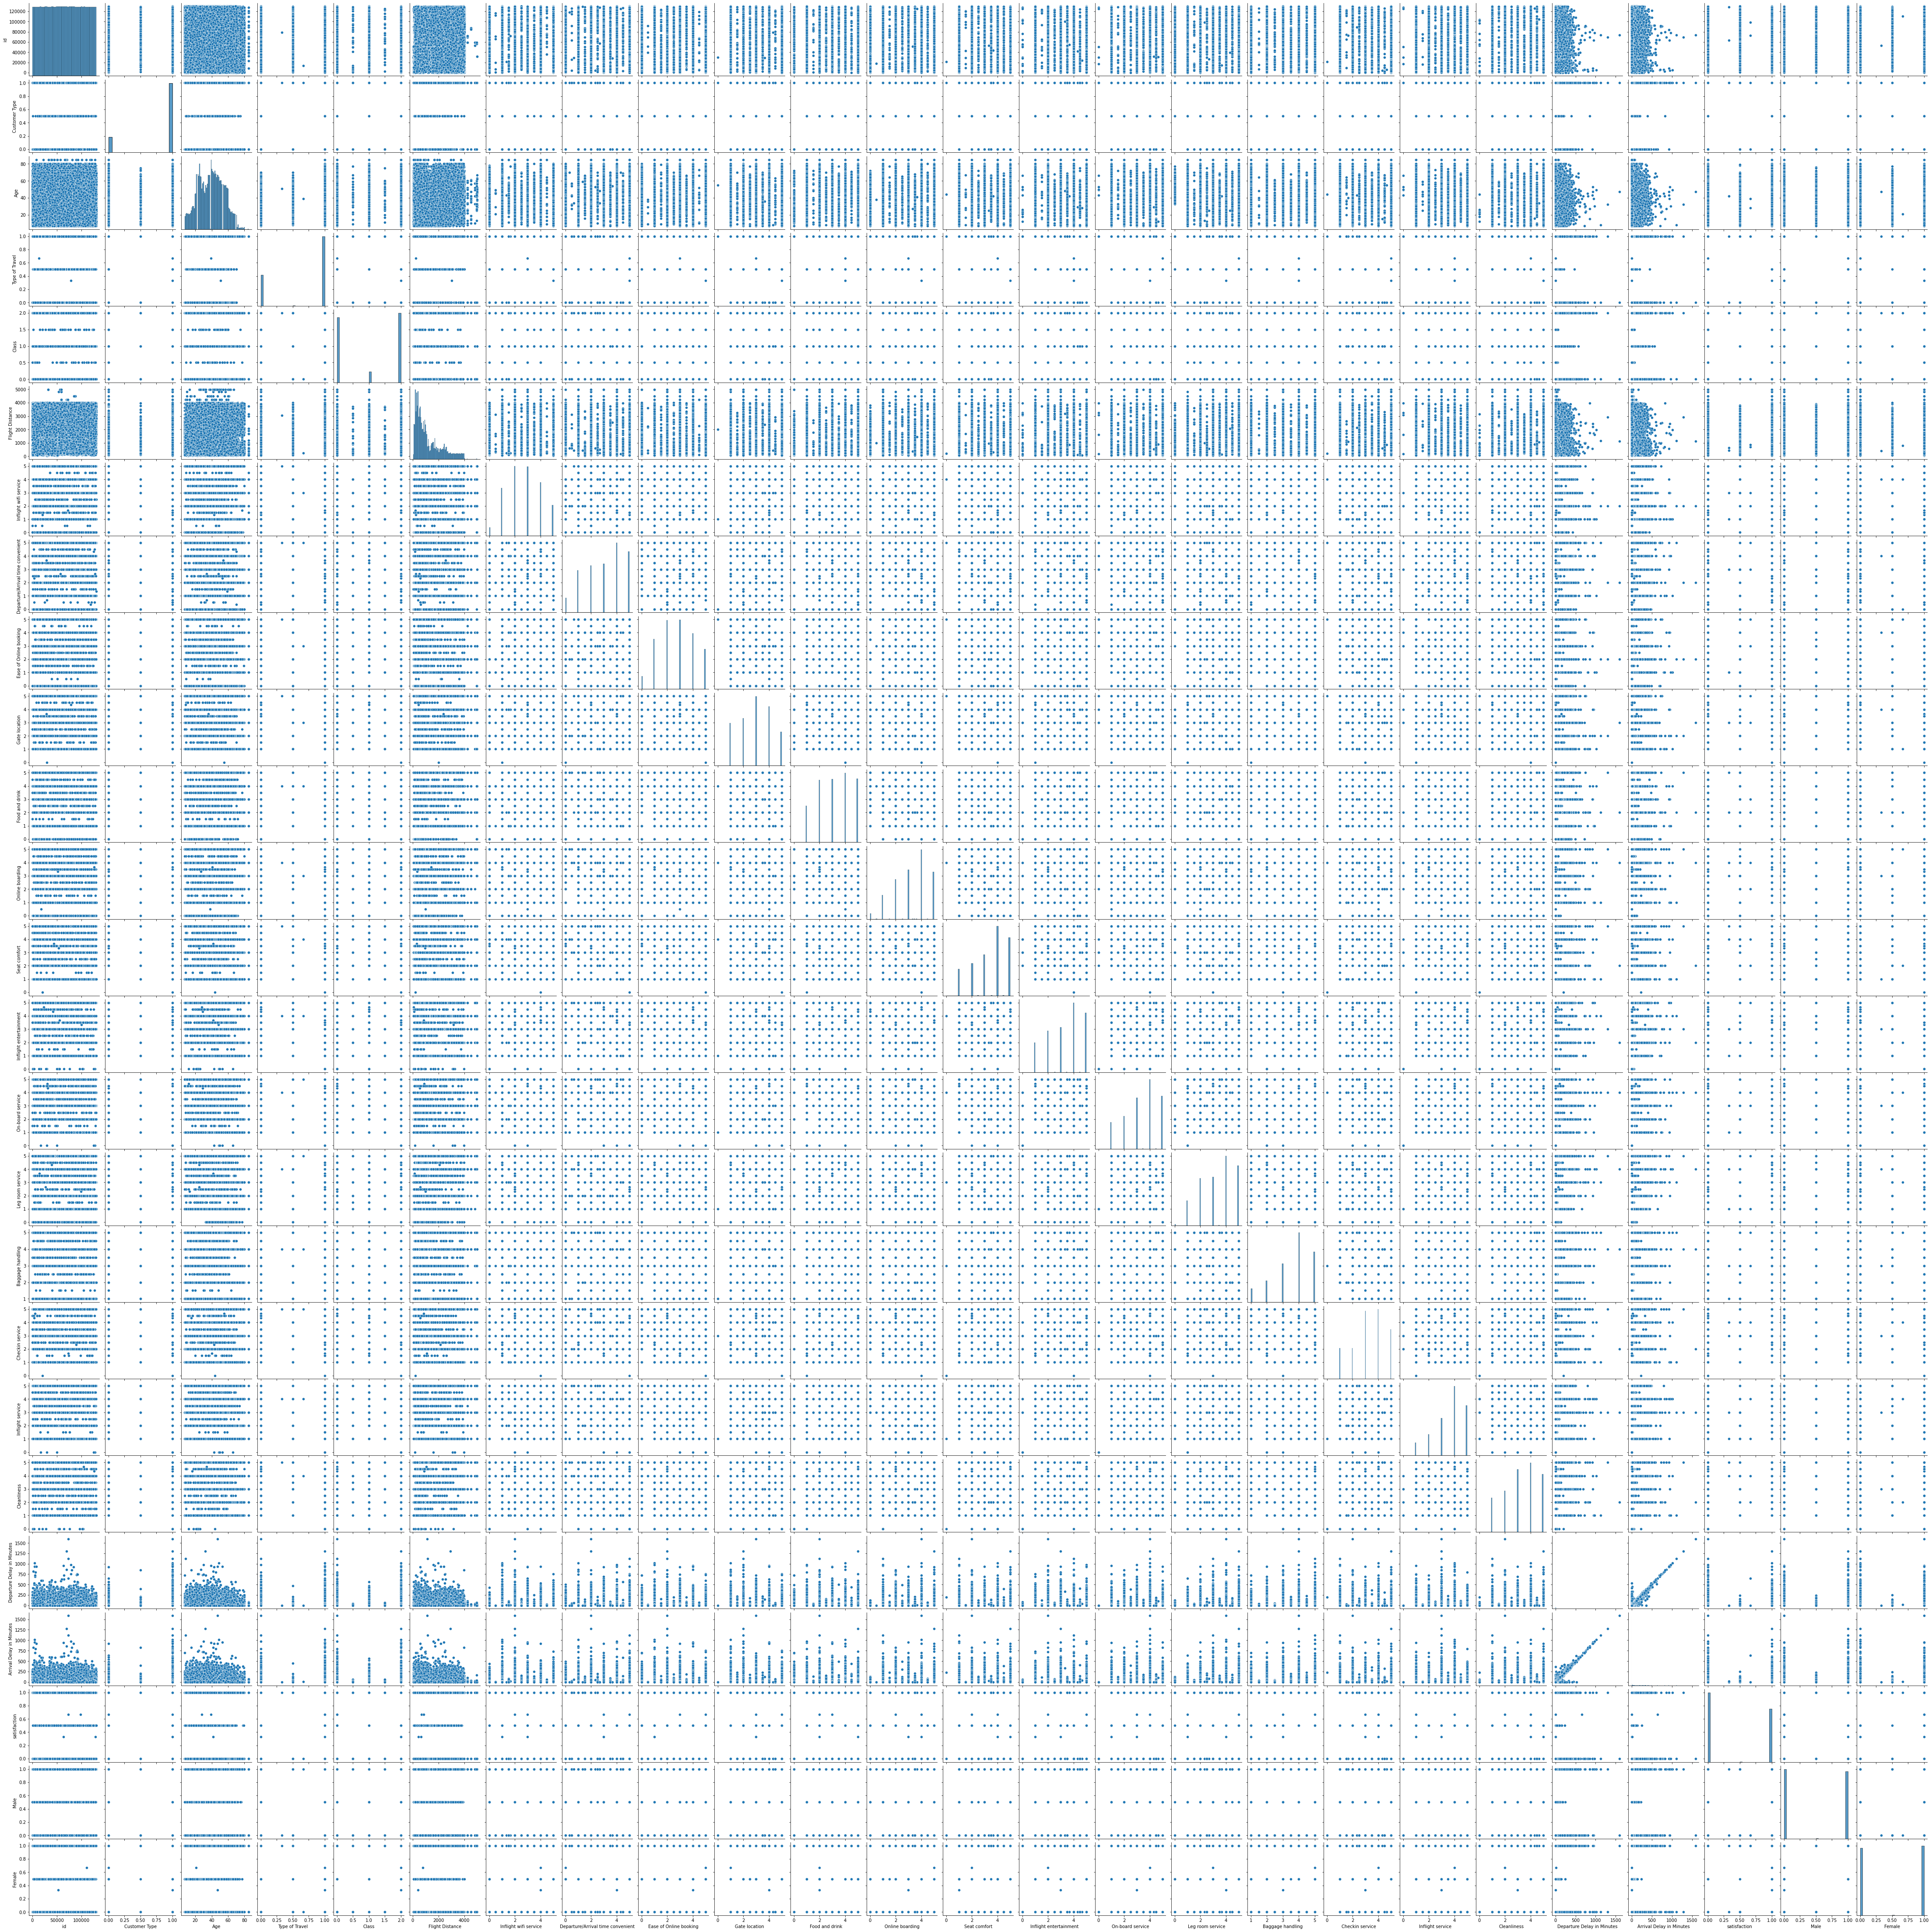

In [295]:
import seaborn as sns
sns.pairplot(data)

In [74]:
# splitting data after processing
test, train = data[data["ind"].eq("test")], data[data["ind"].eq("train")]